<a href="https://colab.research.google.com/github/mdeasinkhandokar/Machine_Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


In [37]:
#get dataset
df_start=pd.read_csv("/content/drive/MyDrive/CSV/50_Startups.xls")
df_start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
#Describe data
df_start.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<ipython-input-39-ce8da453501b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_start['Profit'])


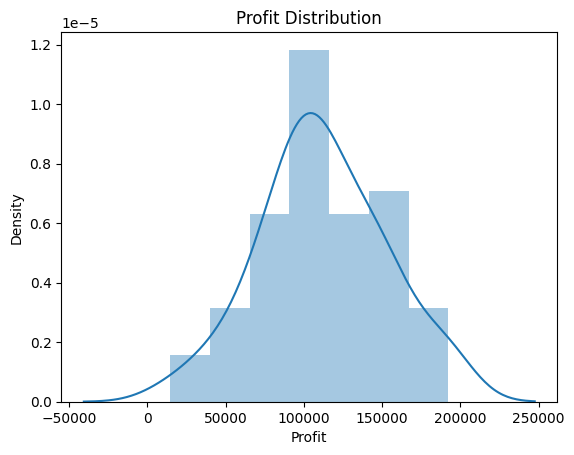

In [39]:
#Data distribution
import seaborn as sns
plt.title("Profit Distribution")
sns.distplot(df_start['Profit'])
plt.show()

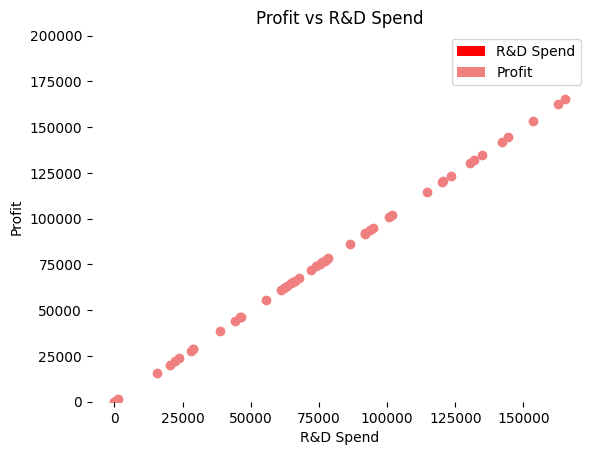

In [40]:
#RelationShip between Profit and R&D Spend
plt.scatter(df_start['R&D Spend'],df_start['R&D Spend'],color='lightcoral')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.box(False)
plt.bar(df_start ['R&D Spend'],df_start['Profit'],width=0.4,color="red",label="R&D Spend")
plt.bar(df_start['R&D Spend'],df_start['Profit'],width=0.4,color="lightcoral",label="Profit")
plt.legend(loc='upper right')
plt.show()

In [41]:
#Split dataset in dependent /independent variables
x=df_start.iloc[:,:-1].values
y=df_start.iloc[:,-1].values


In [42]:
#One-hot encoding of categorical data
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [45]:
#Splitting dataset into test/train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [46]:
#Refressor model
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [47]:
#predict result
y_pred=regressor.predict(x_test)


In [48]:
#Compare predicted result with actual value
np.set_printoptions(precision=2)
result=np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
result

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

In [49]:
#Regressor coefficients and intercept
print(f'Coefficiennt:{regressor.coef_}')
print(f'Intercept:{regressor.intercept_}')

Coefficiennt:[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
Intercept:42467.52924853278
